# Monte Carlo Method — A Practical Introduction

Monte Carlo (MC) methods estimate numbers by random sampling.
If you can sample points uniformly in a region and evaluate a function there, you can estimate integrals, areas, and volumes.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

## 0. Find max

Using Monte Carlo method to find the maximum of $\sin(10x)+x$ for $x \in [0,1]$.

MC best: x = 0.786924378, f = 1.786807913 (from 200 samples)
Optimal: x = 0.795413844, f = 1.790402343


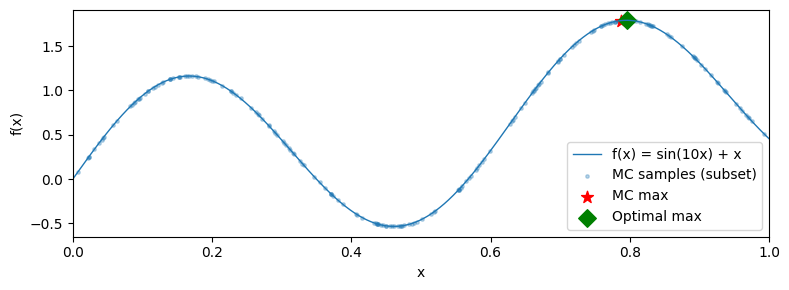

In [5]:

# Monte Carlo search for max of f(x) = sin(10x) + x on [0,1]
def f(x):
    return np.sin(10 * x) + x

rng = np.random.default_rng(42)
N_samples = 2_00
xs = rng.random(N_samples)        # uniform samples on [0,1)
ys = f(xs)

i_best = int(np.argmax(ys))
x_best, y_best = float(xs[i_best]), float(ys[i_best])

print(f"MC best: x = {x_best:.9f}, f = {y_best:.9f} (from {N_samples} samples)")

# Visualize function and a subset of samples
xs_plot = np.linspace(0, 1, 1000)
ys_plot = f(xs_plot)

plt.figure(figsize=(8, 3))
plt.plot(xs_plot, ys_plot, lw=1, label='f(x) = sin(10x) + x')
plt.scatter(xs[:2000], ys[:2000], s=6, alpha=0.3, label='MC samples (subset)')
plt.scatter([x_best], [y_best], color='red', s=80, marker='*', label='MC max')
plt.xlim(0, 1)
plt.xlabel('x')
plt.ylabel('f(x)')

# Compare with optimal solution using scipy.optimize
from scipy.optimize import minimize_scalar
res = minimize_scalar(lambda x: -f(x), bounds=(0, 1), method='bounded')
x_opt = res.x
y_opt = f(x_opt)
plt.scatter([x_opt], [y_opt], color='green', s=80, marker='D', label='Optimal max')
print(f"Optimal: x = {x_opt:.9f}, f = {y_opt:.9f}")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



## 1. Area of a circle (radius 2)
Sample points in the square $[-1,1]^2$ and count the fraction inside the circle.
Area estimate is square area $\times$ inside fraction. True area is $\pi r^2 = 4\pi$.

In [26]:
N = 1000000
random.seed(42)
np.random.seed(42)

def random_point_in_square():
    return (random.uniform(-1, 1), random.uniform(-1, 1))

def is_in_circle(pt):
    x, y = pt
    return x**2 + y**2 <= 1**2

# Version 1: loop
Nc = 0
for _ in range(N):
    pt = random_point_in_square()
    inside = is_in_circle(pt)
    if inside:
        Nc += 1
print(f"Points inside circle: {Nc} out of {N}")
print(f"(version1) Estimated pi and area of the circle with r = 1: {4 * (Nc/N)}")

# Version 2: comprehension
count_in_circle = sum(1 for _ in range(N) if is_in_circle(random_point_in_square()))
area_square = (2 * 1) ** 2  # side length 2
area_circle_estimate = area_square * (count_in_circle / N)
print(f"(version2) Estimated area of circle: {area_circle_estimate}, True area: {math.pi * 1**2}")



Points inside circle: 785061 out of 1000000
(version1) Estimated pi and area of the circle with r = 1: 3.140244
(version2) Estimated area of circle: 3.142224, True area: 3.141592653589793


## 2. Volume of a unit sphere and estimating $\pi$
Sample in cube $[-1,1]^3$. Fraction inside sphere times cube volume (8) gives sphere volume $\frac{4}{3}\pi$.
Thus $\pi = 6 \times$ fraction.

In [32]:
N = 1000000
random.seed(42)
np.random.seed(42)

def random_point_in_square():
    return (random.uniform(-1, 1), random.uniform(-1, 1), random.uniform(-1, 1))

def is_in_3d_sphere(pt):
    x, y, z = pt
    return x**2 + y**2 + z**2  <= 1**2

# Version 2: comprehension
Nc = sum(1 for _ in range(N) if is_in_3d_sphere(random_point_in_square()))
vol_cube = (2 * 1) ** 3  # side length 2
vol_sphere_estimate = vol_cube * (Nc / N)
print(f"Estimated volume of sphere: {vol_sphere_estimate}, True volume: {4/3*math.pi * 1**3}")

Estimated volume of sphere: 4.188496, True volume: 4.1887902047863905


## 3. Core idea (in one line)
If $U$ is uniformly random in a region $D$ with volume $|D|$, then\n
$$\int_D f(x)\,dx = |D|\;\mathbb{E}[f(U)]\approx |D|\;\frac{1}{N}\sum_{i=1}^N f(u_i).$$
- The estimate gets better like $\propto 1/\sqrt{N}$.
- Set a random seed to get repeatable results.

In [5]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

# Reproducible RNG
rng = np.random.default_rng(42)

## 4. Random numbers and distributions (quick look)
We'll draw Uniform(0,1) and Normal(0,1) samples and plot histograms.

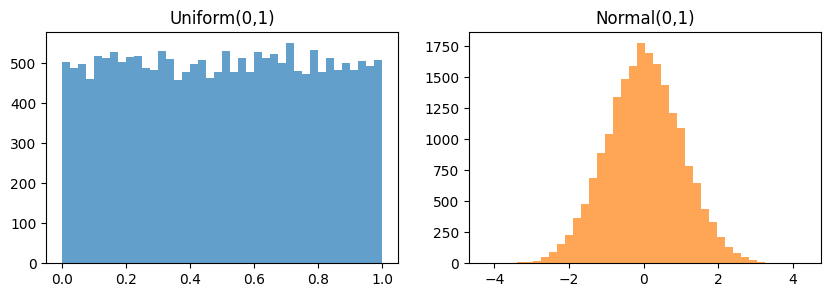

In [6]:
n = 20_000
u = rng.random(n)                 # Uniform(0,1)
g = rng.standard_normal(n)        # Normal(0,1)

fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].hist(u, bins=40, color='tab:blue', alpha=0.7); ax[0].set_title('Uniform(0,1)')
ax[1].hist(g, bins=40, color='tab:orange', alpha=0.7); ax[1].set_title('Normal(0,1)')
plt.show()

## 5 Integral

Using Monte Carlo method to compute the following: $\int_0^1 e^{-x} dx$.

In [38]:
N = 1000000
rng = np.random.default_rng(42)
xs = rng.uniform(0, 1, N)
ys = rng.uniform(0, 1, N)

# f(x) = exp(-x)
mask = ys < np.exp(-xs)
hits = np.sum(mask)
area_square = 1 * 1
integral_estimate = area_square * (hits / N)
print(f"Estimated integral (hit-or-miss): {integral_estimate}")

# Mean value theorem method (average f(x) over [0,1])
mean_value_estimate = np.mean(np.exp(-xs))
print(f"Estimated integral (mean value theorem): {mean_value_estimate}")

# True value of the integral
true_value = 1 - np.exp(-1)
print(f"True value: {true_value}")

print(f"mean value theorem usually gives less error then hit-or-miss")


Estimated integral (hit-or-miss): 0.632531
Estimated integral (mean value theorem): 0.6320954109709868
True value: 0.6321205588285577
mean value theorem usually gives less error then hit-or-miss


## 5. Triple integral over a cube
Estimate
$$I = \iiint_{[-1,1]^3} x^2(y-1)^2(z-2)^2 e^{xyz}\,dx\,dy\,dz.$$
We sample uniformly in the cube and average.

In [15]:
def f(x, y, z):
    return x**2 * (y - 1)**2 * (z - 2)**2 * np.exp(x*y*z)


N = 10000000
rng = np.random.default_rng(42)
xs = rng.uniform(-1, 1, N)
ys = rng.uniform(-1, 1, N)
zs = rng.uniform(-1, 1, N)

ests = f(xs, ys, zs)
integral_estimate = 2*2*2 * np.mean(ests)
print(f"Estimated integral: {integral_estimate}")

Estimated integral: 16.05876296718591


In [ ]:
def gen_point():
    return np.random.random()*2-1, np.random.random()*2-1, np.random.random()*2-1

s = 0
m = 100000
for _ in range(m):
    x, y, z = gen_point()
    s += f(x, y, z)
integral_estimate = 8 * s / m
print(f"Estimated integral: {integral_estimate}")

## 6. Integral over a sphere (unit ball)
We want the same integrand but over $\{(x,y,z): x^2+y^2+z^2 \le 1\}$.
To sample uniformly in a ball: pick a random direction on the sphere and a radius $r=U^{1/3}$.

In [9]:
# using numpy to filter out points inside the unit circle
N = 1000000
rng = np.random.default_rng(42)
xs = rng.uniform(-1, 1, N)
ys = rng.uniform(-1, 1, N)
zs = rng.uniform(-1, 1, N)

dists = xs**2 + ys**2 + zs**2
inside_mask = dists <= 1**2
print(inside_mask)
print(len(xs[inside_mask]))

ests = f(xs[inside_mask], ys[inside_mask], zs[inside_mask])
volume_ball = (4/3) * math.pi * (1**3)
integral_estimate = volume_ball * np.mean(ests)
print(f"Estimated integral (inside ball): {integral_estimate}")

[ True  True False ...  True False  True]
523591
Estimated integral (inside ball): 3.9717929736200586


In [ ]:
def g(x,y,z):
    if x**2 + y**2 + z**2 < 1:
        return f(x,y,z)
    else:
        return 0

s = 0
m = 100000
for _ in range(m):
    x, y, z = gen_point()
    s += g(x, y, z)
integral_estimate = 8 * s / m
print(f"Estimated integral: {integral_estimate}")

## 7. Area under a curve: $y=x^2$ on $[0,3]$
Two quick ways: (1) integrate in 1D; (2) hit-or-miss in a bounding box. True area is $\int_0^3 x^2 dx = 9$.

In [10]:
N = 10000

def f(x):
    return x**2

rng = np.random.default_rng(42)
xs = rng.uniform(0, 3, N)
ys = rng.uniform(0, 9, N)


# filter points where y < f(x)
mask = ys < f(xs)
ests = sum(mask)
area_rectangle = 3 * 9
integral_estimate = area_rectangle * (ests / N)
print(f"Estimated integral (area under curve): {integral_estimate}")

Estimated integral (area under curve): 9.0369


## 8. Convergence: error vs number of samples
We'll estimate $\pi$ multiple times for different $N$ and plot empirical standard deviation of the estimates. Expect slope $-1/2$ on a log-log plot.

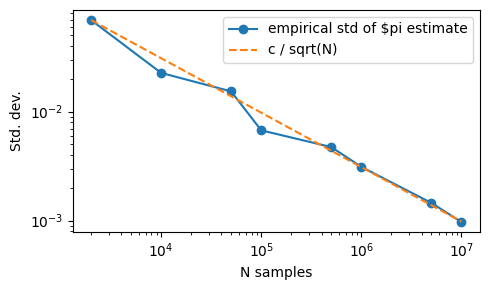

In [11]:
Ns = np.array([2_000, 10_000, 50_000, 100_000, 500_000, 1_000_000, 5_000_000, 10_000_000])
trials = 20
stds = []
for N in Ns:
    ests = []
    for t in range(trials):
        P = rng.uniform(-1, 1, size=(N,3))
        frac = float(np.mean(np.sum(P**2, axis=1) <= 1.0))
        ests.append(6.0*frac)
    stds.append(np.std(ests, ddof=1))

plt.figure(figsize=(5,3))
plt.loglog(Ns, stds, 'o-', label='empirical std of $pi estimate')
# Reference ~ c / sqrt(N): fit c using first point
c = stds[0] * math.sqrt(Ns[0])
plt.loglog(Ns, c/np.sqrt(Ns), '--', label='c / sqrt(N)')
plt.xlabel('N samples')
plt.ylabel('Std. dev.')
plt.legend(); plt.tight_layout(); plt.show()

## 9. A reusable MC integrator (hypercube)
We'll integrate over a box: bounds = [(a1,b1),...,(ad,bd)].
Returns estimate and a simple standard-error estimate.

In [12]:
# write reuseable functions for Monte Carlo integration
def monte_carlo_integration(func, sample_func, volume, N):
    samples = np.array([sample_func() for _ in range(N)])
    func_values = np.array([func(*sample) for sample in samples])
    integral_estimate = volume * np.mean(func_values)
    return integral_estimate

## 10. Takeaways
- MC estimates averages with error that shrinks like $1/\sqrt{N}$.
- Integrals over regions: sample uniformly in the region (box, ball, etc.).
- Use a seed for repeatability.
- For faster convergence, consider variance reduction (stratified sampling, control variates) — not covered here but very helpful in practice.